In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore")

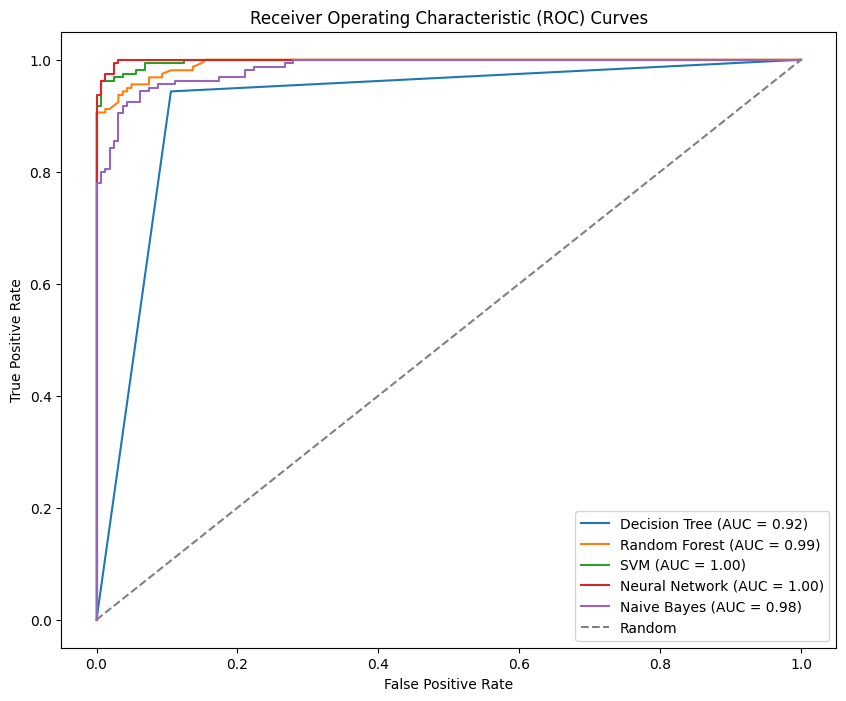

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
df = pd.read_excel("C2_resultadofim.xlsx")

# Dividir o conjunto de dados em recursos (X) e rótulos (y)
X = df.drop("price_range", axis=1)
y = df["price_range"]

# Codificar os rótulos usando LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Lista de modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Inicializar a figura para o gráfico ROC
plt.figure(figsize=(10, 8))

# Loop através dos modelos
for model_name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Obter as probabilidades previstas para a classe positiva
    y_probas = model.predict_proba(X_test)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_probas)
    roc_auc = auc(fpr, tpr)

    # Plotar a curva ROC para cada modelo
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Adicionar linha diagonal (Aleatório)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')


# Ajustar detalhes do gráfico
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
